In [1]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import numpy as np

In [2]:
z=zipfile.ZipFile("C:/Users/claud/Downloads/20220411_1333_REVOCACION_MANDATO_2022.zip")
z.namelist()

['20220411_1333_REVOCACION_MANDATO_2022/',
 '20220411_1333_REVOCACION_MANDATO_2022/20220411_1333_COMPUTOS_RM2022.csv',
 '20220411_1333_REVOCACION_MANDATO_2022/CATALOGO_UNIDADES_TERRITORIALES_RM2022.csv',
 '20220411_1333_REVOCACION_MANDATO_2022/LEEME.txt']

In [3]:
df=pd.read_csv(z.open('20220411_1333_REVOCACION_MANDATO_2022/20220411_1333_COMPUTOS_RM2022.csv'),encoding='latin-1', skiprows=6)
df.columns=df.columns.str.lower()
df.columns

Index(['clave_casilla', 'clave_acta', 'id_entidad', 'entidad',
       'id_distrito_federal', 'distrito_federal', 'sección', 'id_casilla',
       'tipo_casilla', 'ext_contigua', 'ubicación_casilla', 'num_acta_impreso',
       'que_se_le_revoque_el_mandato_por_pérdida_de_la_confianza',
       'que_siga_en_la_presidencia_de_la_república', 'nulos',
       'total_votos_calculados', 'lista_nominal', 'observaciones',
       'mecanismos_traslado', 'tipo_documento', 'fecha_hora_captura',
       'código_integridad'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57449 entries, 0 to 57448
Data columns (total 22 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   clave_casilla                                             57449 non-null  object
 1   clave_acta                                                57449 non-null  object
 2   id_entidad                                                57449 non-null  int64 
 3   entidad                                                   57449 non-null  object
 4   id_distrito_federal                                       57449 non-null  int64 
 5   distrito_federal                                          57449 non-null  object
 6   sección                                                   57449 non-null  int64 
 7   id_casilla                                                57449 non-null  int64 
 8   tipo_casilla              

In [5]:
#string a numeric
for col in  df.columns[11:17]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [6]:
extranjero=df.query("id_entidad==0")
extranjero
extranjero["seguir"]=extranjero["que_siga_en_la_presidencia_de_la_república"]/extranjero["total_votos_calculados"]*100
extranjero["revocar"]=100-extranjero["seguir"]

C:\Users\claud\AppData\Local\Temp\ipykernel_24456\4224264843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extranjero["seguir"]=extranjero["que_siga_en_la_presidencia_de_la_república"]/extranjero["total_votos_calculados"]*100
C:\Users\claud\AppData\Local\Temp\ipykernel_24456\4224264843.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extranjero["revocar"]=100-extranjero["seguir"]


In [7]:
extranjero=extranjero[["id_entidad","seguir", "revocar"]]
extranjero

,id_entidad,seguir,revocar
0,0,76.312296,23.687704


In [8]:
extranjero=pd.melt(extranjero,id_vars=['id_entidad'],var_name='voto', value_name='pct')
extranjero

,id_entidad,voto,pct
0,0,seguir,76.312296
1,0,revocar,23.687704


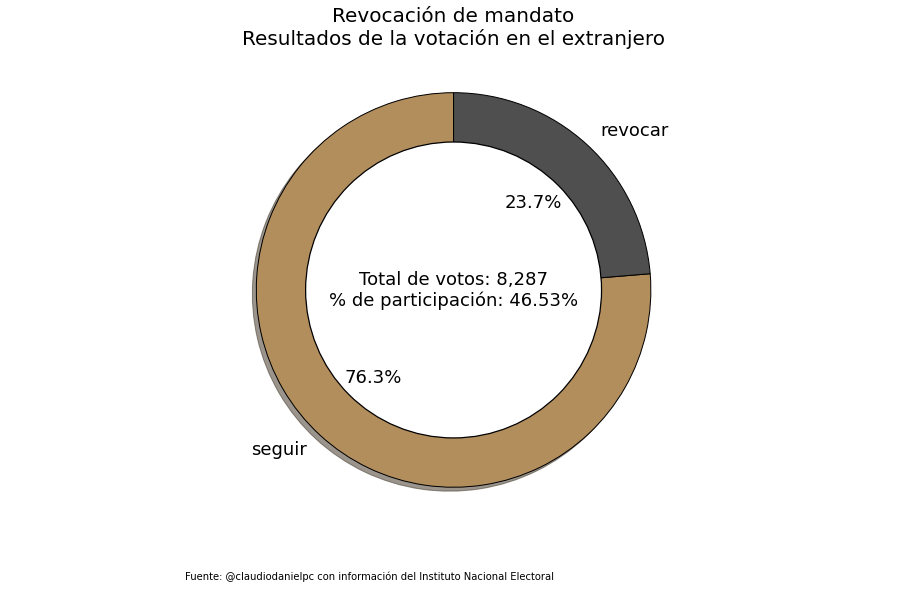

In [9]:
plt.rcParams['font.size'] = 18
fig=plt.figure(figsize=(16,8))


colores=["#b38e5d","#4f4f4f"]

plt.pie(extranjero["pct"],labels=extranjero["voto"],colors=colores,
autopct='%1.1f%%',shadow=True, startangle=90,wedgeprops={'edgecolor':'black'})

#Título del gráfico
plt.title("Revocación de mandato\n"
          "Resultados de la votación en el extranjero\n"
          
          ,size=20)

centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.text(0., 0., "Total de votos: 8,287\n% de participación: 46.53%", horizontalalignment='center', verticalalignment='center')

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')


fig.text(0.6, 0,
        'Fuente: @claudiodanielpc con información del Instituto Nacional Electoral',ha="right",
         size=10)
fig.savefig('D:/Documentos/Github/30DayChartChallenge/2022/day_11/day11.png', bbox_inches='tight')